In [2]:
%load_ext autoreload
%autoreload 2

import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import src.utils.globals as g

sys.path.append('../../src/')
from noise import NoiseMachine  # type: ignore

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
df_in = pd.read_parquet(g.path_imu)

In [4]:
seqids = df_in['seqid'].unique()
randid = np.random.choice(seqids, 1)[0]
df_seq = df_in[df_in['seqid'] == randid]

acc_columns = ['acceleration_x', 'acceleration_y', 'acceleration_z']


In [ ]:
def plot_dfs(dfs, column='acceleration_x', title="", colnums=3):
    # Calculate the number of rows needed
    cols = colnums
    num_plots = len(dfs)
    rows = (num_plots + cols - 1) // cols  # Ceiling division to ensure enough rows

    # Create a figure with subplots
    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))

    # Flatten axes for easy indexing if needed
    axes = axes.flatten()

    # Loop through the DataFrames and plot each in the corresponding subplot
    for i, (name, df) in enumerate(dfs.items()):
        NoiseMachine._plot(data=df, ax=axes[i], column=column)

    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle(title)
    plt.tight_layout()

    # Show the plot
    plt.show()

In [8]:
df_test = NoiseMachine.point_anomaly(df_seq.copy(), 'acceleration_x', 10)

f:\edmo-project\Processing\src\utils\noise.py:178: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


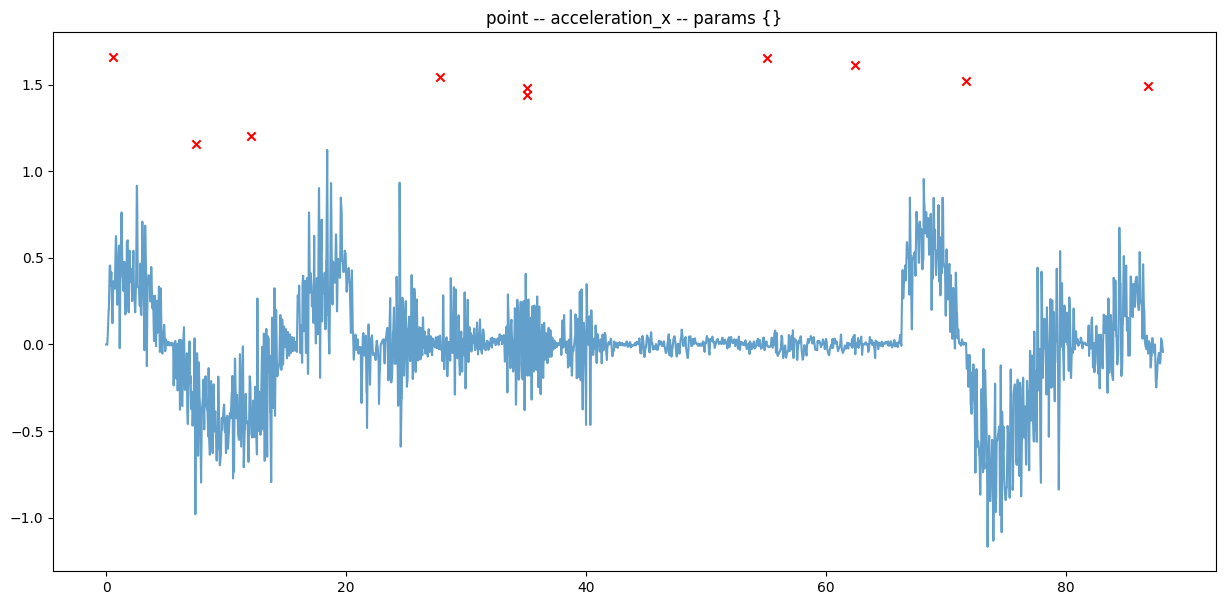

In [12]:
NoiseMachine.plot(df_test, 'acceleration_x')

f:\edmo-project\Processing\src\utils\noise.py:179: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


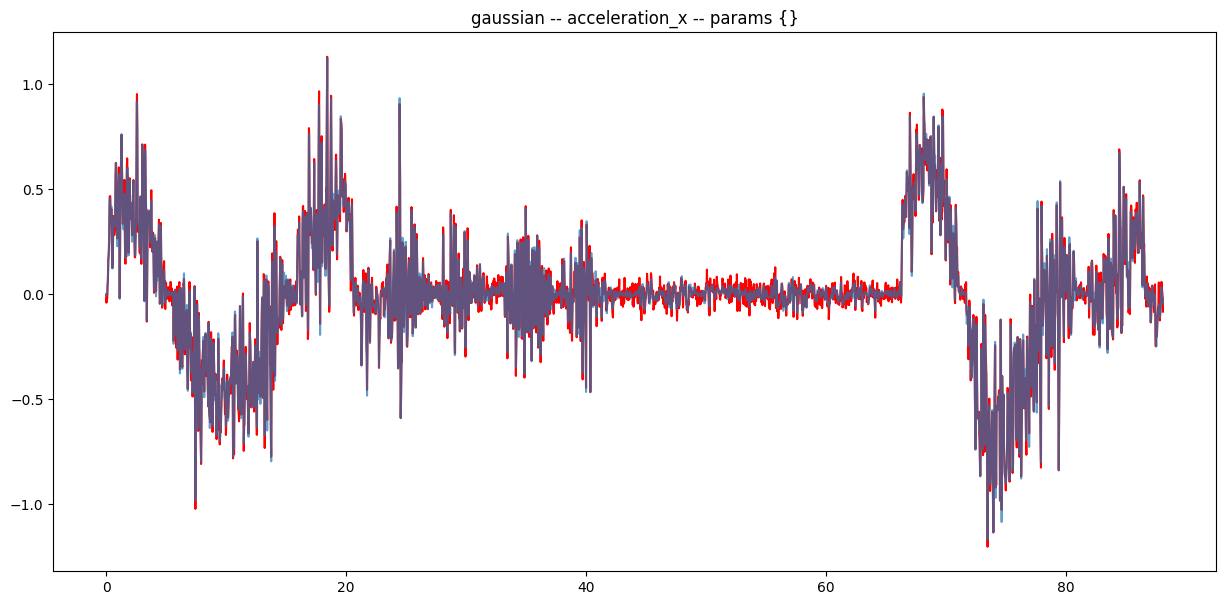

In [16]:
test = NoiseMachine.gaussian_anomaly(df_seq.copy(), acc_columns[0], stdtimes=0.1)
NoiseMachine.plot(test, 'acceleration_x')

f:\edmo-project\Processing\src\utils\noise.py:178: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


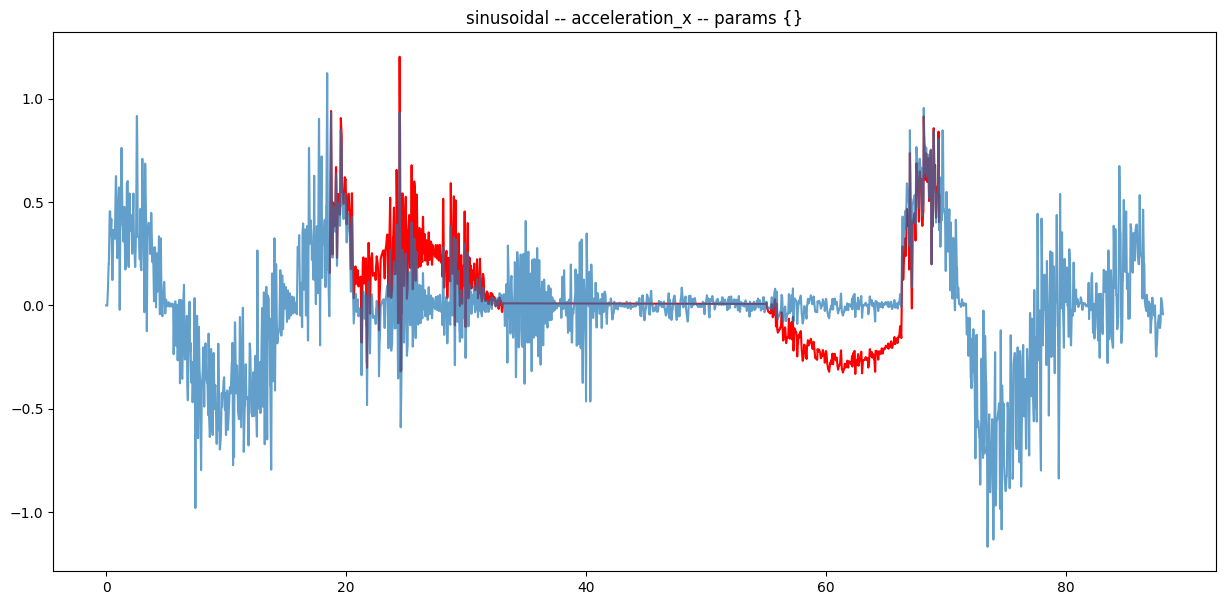

In [14]:
df_test = NoiseMachine.sinusoidal_anomaly(df_seq.copy(), 'acceleration_x', anomlength=0.33, amplitude=1)
NoiseMachine.plot(df_test, 'acceleration_x')